# Gravitational Models Comparison

In this tutorial, we'll compare various `Gravitational Models`.

## Setup

Let's install the necessary libraries:

In [1]:
import sys

! {sys.executable} -m pip install --quiet LibraryPhysicsPy

In [1]:
import numpy as np
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [2]:
import Library.Physics as Physics

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

to-Python converter for library::physics::time::DateTime already registered; second conversion method ignored.

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

to-Python converter for library::math::obj::IntervalBase::Type already registered; second conversion method ignored.



In [3]:
Instant = Physics.Time.Instant
Earth = Physics.Environment.Objects.CelestialBodies.Earth
SphericalGravitationalModel = Physics.Environment.Gravitational.Spherical
EarthGravitationalModel = Physics.Environment.Gravitational.Earth

## Comparison

Let's set up some gravitational models:

In [73]:
gravitational_models = [
    SphericalGravitationalModel(Earth.Models.WGS84.GravitationalParameter),
    EarthGravitationalModel(EarthGravitationalModel.Type.WGS84),
    EarthGravitationalModel(EarthGravitationalModel.Type.EGM84),
    EarthGravitationalModel(EarthGravitationalModel.Type.EGM96),
#     EarthGravitationalModel(EarthGravitationalModel.Type.EGM2008)
]

And evaluate them at various altitudes:

In [107]:
altitudes = list(range(0, 1000000, 100000))

In [108]:
instant = Instant.J2000()

In [109]:
positions = [np.array([float(Earth.Models.WGS84.EquatorialRadius.inMeters() + altitude), 0.0, 0.0]) for altitude in altitudes]

In [110]:
def evaluate_field_values (gravitational_model, positions):
    
    field_values = [np.transpose(gravitational_model.getFieldValueAt(position, instant))[0] for position in positions]
    
    return field_values

In [111]:
field_valuess = [evaluate_field_values(gravitational_model, positions) for gravitational_model in gravitational_models]

In [112]:
field_dfs = [pd.DataFrame([[altitude, *field.tolist()] for [altitude, field] in zip(altitudes, field_values)], columns=['$altitude [m]$', '$g_x$', '$g_y$', '$g_z$']) for field_values in field_valuess]

In [113]:
field_dfs[0]

,$altitude [m]$,$g_x$,$g_y$,$g_z$
0,0,-9.798285,-0.0,-0.0
1,100000,-9.498117,-0.0,-0.0
2,200000,-9.211534,-0.0,-0.0
3,300000,-8.937728,-0.0,-0.0
4,400000,-8.675951,-0.0,-0.0
5,500000,-8.425509,-0.0,-0.0
6,600000,-8.185756,-0.0,-0.0
7,700000,-7.956093,-0.0,-0.0
8,800000,-7.735961,-0.0,-0.0
9,900000,-7.524841,-0.0,-0.0


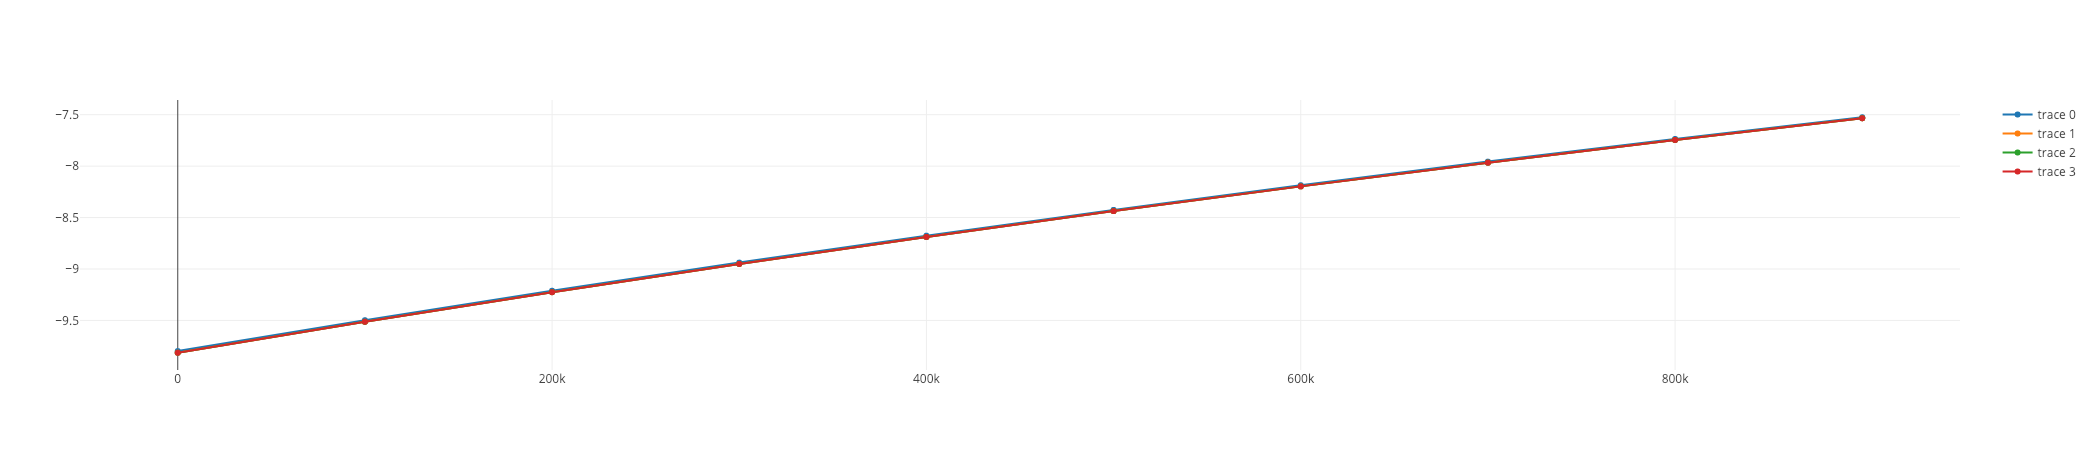

In [114]:
plot_data = [
    go.Scatter(
        x = field_df['$altitude [m]$'],
        y = field_df['$g_x$']
    )
    for field_df in field_dfs
]

iplot(plot_data)